# Customer Churn Prediction
## Step 1: Import the necessary Dependencies

In [5]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

## Step 2: Load the Dataset

In [6]:
df = pd.read_csv("./data/data.csv")

## Step 3: Data Analysis

In [9]:
# set max columns to see all columns otherwise some columns will not be visible
pd.set_option("display.max_columns",None) 

In [10]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [11]:
df.shape

(243787, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

### Befor doing analysis let us import our function from `utils.py`
Save PYTHON PATH to system:
```python
import sys
import os
notebook_dir = os.getcwd()
src_dir = os.path.join(notebook_dir, '..', 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)  # Add the src directory to sys.path
```
Remove from PYTHON PATH after doing work:
```python
try:
    sys.path.remove(src_dir)
    print(f"Path '{src_dir}' has been removed from sys.path.")
except ValueError:
    print(f"Path '{src_dir}' not found in sys.path.")
```

In [130]:
import sys
import os
notebook_dir = os.getcwd()
src_dir = os.path.join(notebook_dir, '..', 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)  # Add the src directory to sys.path

## Step 3.1: Numerical Data Analysis/ Numerical feature analysis
#### Check for numerical columns for analysis

In [44]:
from utils import extract_num_columns

In [45]:
num_cols = extract_num_columns(df)
num_cols

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'Churn'],
      dtype='object')

In [46]:
df[num_cols]

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,0
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,0
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,0
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0
...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,13.502729,80.367312,47,3.697451,1,8,0
243783,117,13.049257,1526.763053,24.963291,59.818441,35,1.449742,4,20,0
243784,113,14.514569,1640.146267,10.628728,176.186095,44,4.012217,6,13,0
243785,7,18.140555,126.983887,30.466782,153.386315,36,2.135789,7,5,0


In [48]:
# lets convert all numerical data into float type
from utils import make_float
df = make_float(df, num_cols)

### lets see the results

In [51]:
df[num_cols]

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
0,20.0,11.055215,221.104302,36.758104,63.531377,10.0,2.176498,4.0,3.0,0.0
1,57.0,5.175208,294.986882,32.450568,25.725595,18.0,3.478632,8.0,23.0,0.0
2,73.0,12.106657,883.785952,7.395160,57.364061,23.0,4.238824,6.0,1.0,0.0
3,32.0,7.263743,232.439774,27.960389,131.537507,30.0,4.276013,2.0,24.0,0.0
4,57.0,16.953078,966.325422,20.083397,45.356653,20.0,3.616170,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
243782,77.0,9.639902,742.272460,13.502729,80.367312,47.0,3.697451,1.0,8.0,0.0
243783,117.0,13.049257,1526.763053,24.963291,59.818441,35.0,1.449742,4.0,20.0,0.0
243784,113.0,14.514569,1640.146267,10.628728,176.186095,44.0,4.012217,6.0,13.0,0.0
243785,7.0,18.140555,126.983887,30.466782,153.386315,36.0,2.135789,7.0,5.0,0.0


👆 you can see all the numerical is converted into float type

### Check the descriptive statistics of the numerical data

In [29]:
df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


### Histogram for numerical data

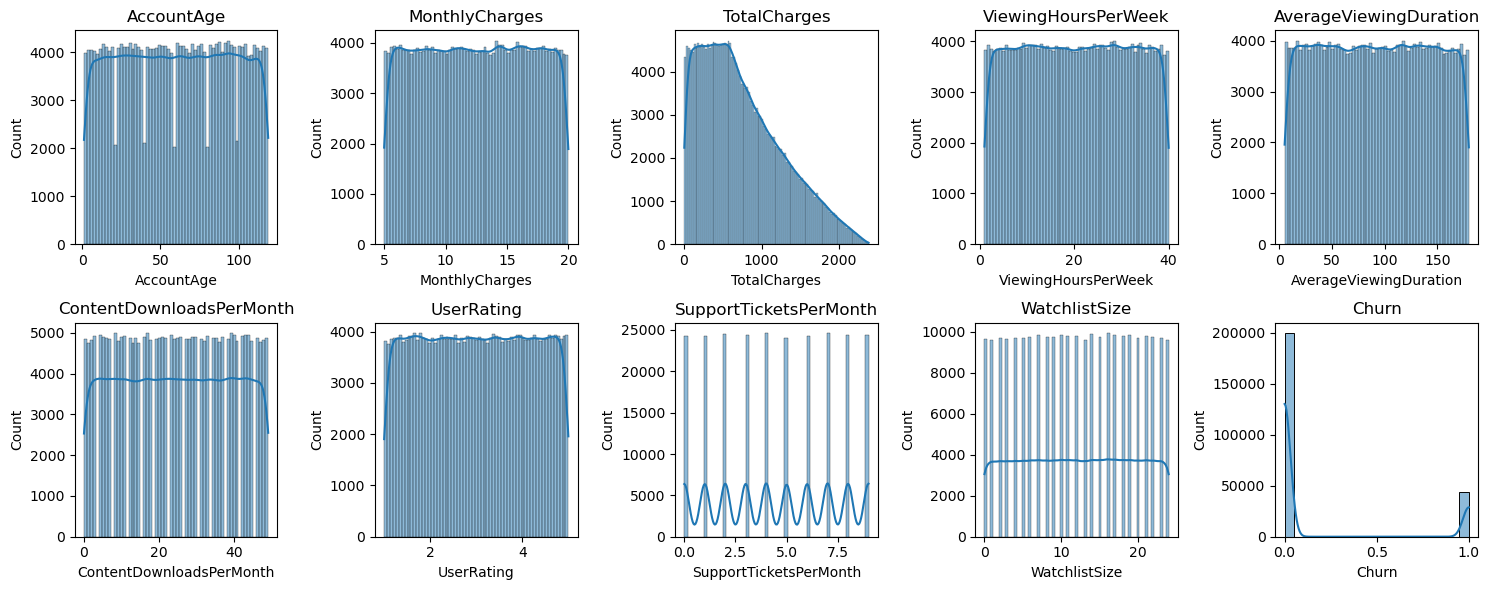

In [52]:
# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6)) # Adjust figsize as needed

# Plotting each figure
for i, col in enumerate(num_cols):
    if i <5:
        sns.histplot(df[col], ax=axes[0, i], kde=True)
        axes[0, i].set_title(col)
    else:
        sns.histplot(df[col], ax=axes[1, i%5], kde=True)
        axes[1, i%5].set_title(col)

plt.tight_layout() # Improves subplot spacing
plt.show()

#### Insights
- we can see `AccountAge, MonthlyCharges, ViewingHoursPerWeek, AverageViewingDuration, ContentDownloadsPerMonth,`\
   `UserRating, SupportTicketsPerMonth, WatchlistSize` follow uniform distribution.
- the column `TotalCharge` is right-skewed distribution.
- **We can see `Churn` is highly imbalanced.** that is, 0's is more in numbers than 1's.

### Lets transform the skewness of `TotalCharges`

In [89]:
totalcharges = df['TotalCharges']
print("Before: :", totalcharges.skew())

Before: : 0.6940677147508422


In [90]:
# apply the transformation
from utils import transform_column
df['TotalCharges'] = transform_column(df['TotalCharges'])

In [91]:
print("After: ", df['TotalCharges'].skew())

After:  0.04393030318793597


👆 Reducing the skewness from 0.69 to 0.04 is a very large improvement.

### Boxplot for numerical data

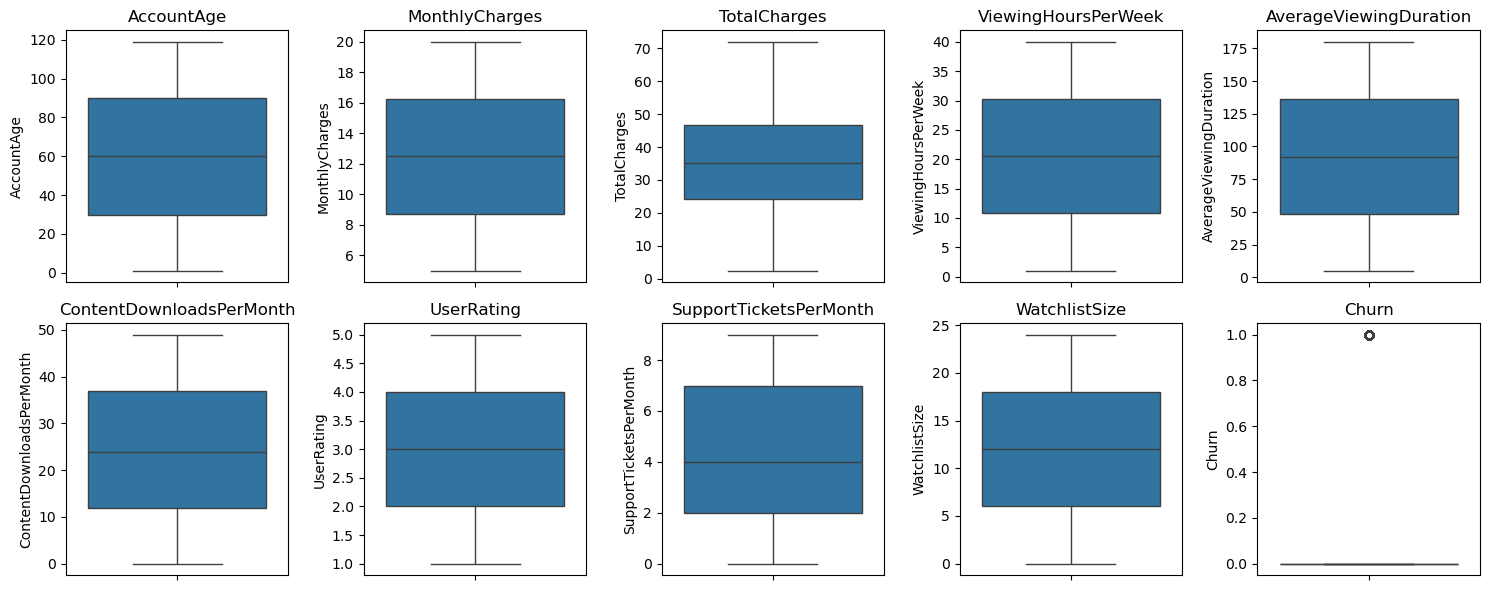

In [92]:
# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6)) # Adjust figsize as needed

# Plotting each figure
for i, col in enumerate(num_cols):
    if i <5:
        sns.boxplot(df[col], ax=axes[0, i])
        axes[0, i].set_title(col)
    else:
        sns.boxplot(df[col], ax=axes[1, i%5])
        axes[1, i%5].set_title(col)

plt.tight_layout() # Improves subplot spacing
plt.show()

We can see that `TotalCharges` column has no outlier along with other columns.

### Heat map
Plot the correlation matrix to see if there is co-linearity.

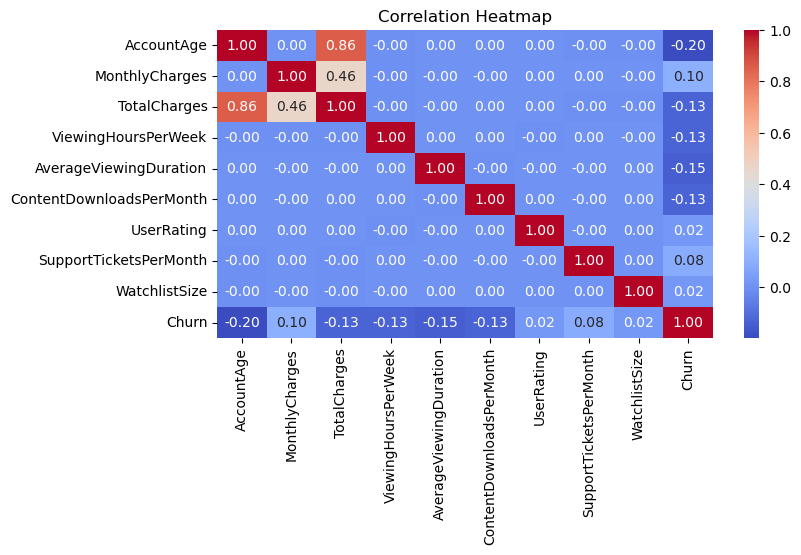

In [93]:
plt.figure(figsize=(8,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Step 3.2: Categorical feature analysis
extract categorical columns from dataframe

In [108]:
from utils import extract_cat_columns
cat_cols = extract_cat_columns(df)

#### lets check the unique value of each cat. column

In [96]:
for c in cat_cols:
    x = df[c].value_counts()
    print(x)
    print("="*21)

SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64
PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64
ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64
DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64
GenrePreference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64
Gender
Female    121930
Male      121857
Name: count, dtype: int64
ParentalControl
Yes    122085
No     121702
Name: count, dtype: int64
SubtitlesEnabled
Yes    122180
No     121607
Name: count, dtype: int64
CustomerID
A6IN701VRY    1
CB6SXPNVZA    1
S7R2G87O09    1
EASDC20BDT    1

you can see `CustomerID` has no meaning here \
so lets drop it 

In [97]:
# drop the column and replace in dataframe
df.drop(columns= ['CustomerID'], inplace = True)

In [98]:
df.shape

(243787, 20)

In [99]:
df.Churn.value_counts()

Churn
0.0    199605
1.0     44182
Name: count, dtype: int64

You can see this dataset is imbalanced since one value(0) is more in number.\
i.e. `Class Imbalance` is identified in the target column.\
so we have to balance the dataset

### countplot

In [107]:
# exclude the customer column since we have droped it from the dataframe
cat_cols = cat_cols[:-1]

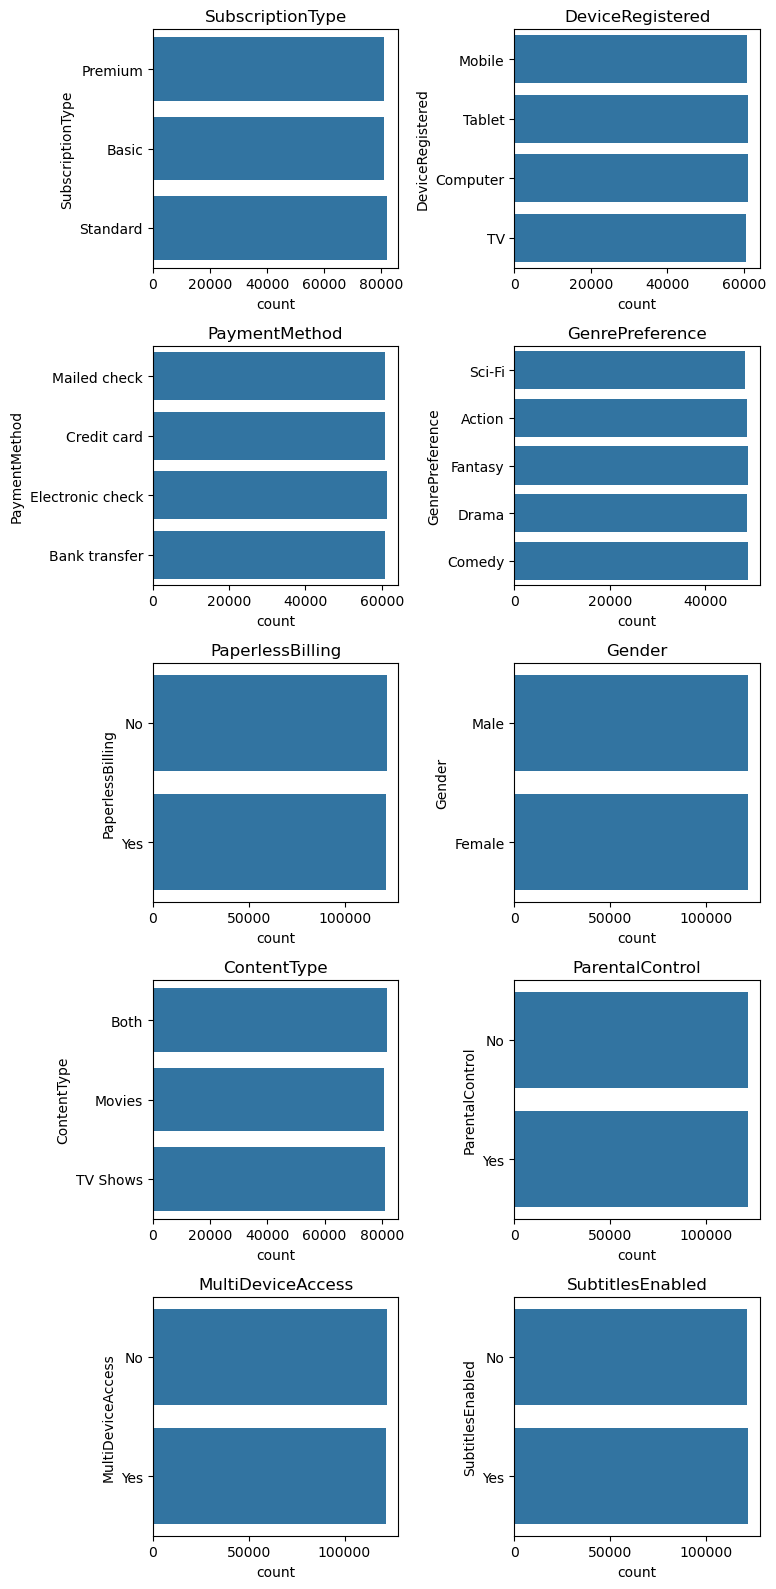

In [109]:
# Create a 2x5 grid of subplots
fig, axes = plt.subplots(5, 2, figsize=(8, 16)) # Adjust figsize as needed

# Plotting each figure
for i, col in enumerate(cat_cols):
    if i <5:
        sns.countplot(df[col], ax=axes[i, 0])
        axes[i, 0].set_title(col)
    else:
        sns.countplot(df[col], ax=axes[i%5, 1])
        axes[i%5, 1].set_title(col)

plt.tight_layout() # Improves subplot spacing
plt.show()

Lets encode the categorical columns into numerical columns
- Use the **Ordinal encoder** in `SubscriptionType`. since there's a clear hierarchy (e.g., Basic < Standard < Premium).
- And for the rest of the columns use the **Label encoder**

## Step 4: Encoders

In [110]:
# Initialize a dictionary to save the encoders
encoders = {}

# Apply the encoding to the training data.
for column in cat_cols:
    if column != "SubscriptionType":
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
    else:
        encoder = OrdinalEncoder(categories='auto')
        df[column] = encoder.fit_transform(df[[column]]) #fit transform expects a 2d array.


    encoders[column] = encoder  # Save the individual encoder
        

In [111]:
# view the encoders
encoders

{'SubscriptionType': OrdinalEncoder(),
 'PaymentMethod': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'ContentType': LabelEncoder(),
 'MultiDeviceAccess': LabelEncoder(),
 'DeviceRegistered': LabelEncoder(),
 'GenrePreference': LabelEncoder(),
 'Gender': LabelEncoder(),
 'ParentalControl': LabelEncoder(),
 'SubtitlesEnabled': LabelEncoder()}

In [114]:
with open('./data/encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [115]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,Churn
0,20.0,11.055215,19.477287,1.0,3,0,0,0,1,36.758104,63.531377,10.0,4,2.176498,4.0,1,3.0,0,0,0.0
1,57.0,5.175208,22.823986,0.0,1,1,1,0,3,32.450568,25.725595,18.0,0,3.478632,8.0,1,23.0,0,1,0.0
2,73.0,12.106657,41.734086,0.0,3,1,1,0,0,7.395160,57.364061,23.0,3,4.238824,6.0,1,1.0,1,1,0.0
3,32.0,7.263743,20.020308,0.0,2,0,2,0,3,27.960389,131.537507,30.0,2,4.276013,2.0,1,24.0,1,1,0.0
4,57.0,16.953078,43.834683,1.0,2,1,2,0,2,20.083397,45.356653,20.0,1,3.616170,4.0,0,0.0,0,0,0.0


#### Save the dataframe
for any future use 

In [116]:
with open('./data/processed_data.pkl', 'wb') as file:
    pickle.dump(df, file)

## Step 5: split the dataset

In [117]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Now lets do the sampling to make target feature balanced
**SMOTE**: Synthetic Minority Oversampling TEchnique.\
Apply SMOTE only to the training data to oversample the minority class.

In [124]:
# use the imported library
smote = SMOTE(random_state=42)

In [125]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [126]:
y_smote.value_counts()

Churn
0.0    159637
1.0    159637
Name: count, dtype: int64

#### 👆 we can see that the training data has been balanced.

In [127]:
# save for model evaluaiton
with open('./data/X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)
with open('./data/y_test.pkl', 'wb') as file:
    pickle.dump(y_test, file)

### Save the `X_smote` and `y_smote` for futute use:

In [128]:
with open('./data/X_smote.pkl', 'wb') as file:
    pickle.dump(X_smote, file)
with open('./data/y_smote.pkl', 'wb') as file:
    pickle.dump(y_smote, file)